<a href="https://colab.research.google.com/github/gblasd/DataScience/blob/BDCC/P2_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv('/content/drive/MyDrive/DataScience/data/pokemon.csv')
pokemon.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


## Carpeta de clases

In [ ]:
main_path = "/content/drive/MyDrive/DataScience/data/images_2"

In [ ]:
import os
import shutil

def build_folders():

    for _, row in pokemon.iterrows():
        nombre = row["Name"]
        tipos = [row["Type1"], row["Type2"]]
        tipos = [t for t in tipos if pd.notna(t)]

        img_origen = None
        for ext in [".png", ".jpg", ".jpeg"]:
            path = os.path.join("/content/drive/MyDrive/DataScience/data/images", f"{nombre}{ext}")
            if os.path.exists(path):
                img_origen = path
                break

        if img_origen is None:
            print(f"Imagen no encontrada: {nombre}")
            continue

        for tipo in tipos:
            carpeta_tipo = os.path.join("/content/drive/MyDrive/DataScience/data/images_2", tipo)
            os.makedirs(carpeta_tipo, exist_ok=True)
            img_destino = os.path.join(carpeta_tipo, os.path.basename(img_origen))
            shutil.copy(img_origen, img_destino)

    print("Imágenes organizadas por ambos tipos correctamente.")

Total de directorios

In [ ]:
!ls /content/drive/MyDrive/DataScience/data/images_2/

Bug   Dragon	Fairy	  Fire	  Ghost  Ground  Normal  Psychic  Steel
Dark  Electric	Fighting  Flying  Grass  Ice	 Poison  Rock	  Water


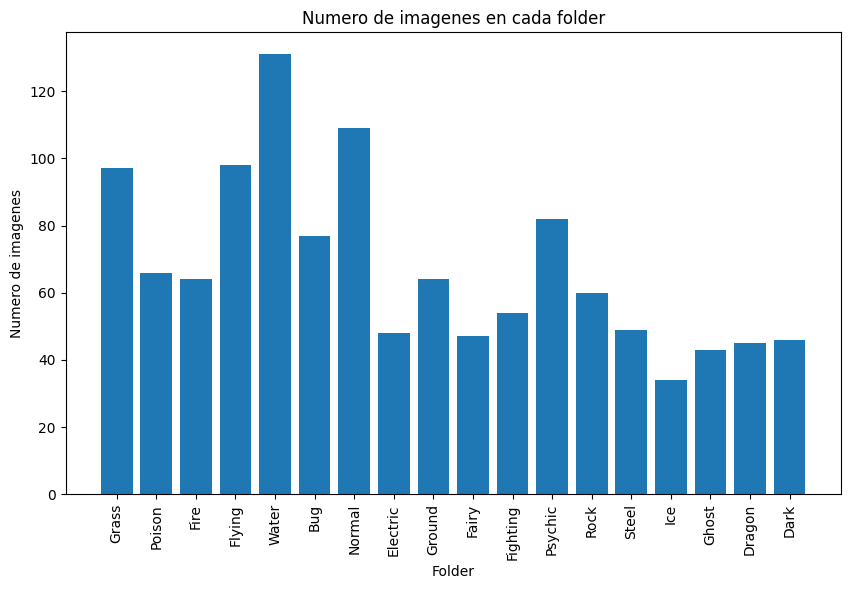

In [ ]:
import os

image_counts = {}
for folder_name in os.listdir(main_path):
    folder_path = os.path.join(main_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        image_counts[folder_name] = len(image_files)

# for folder, count in image_counts.items():
#     print(f"Folder '{folder}': {count} images")

plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Folder')
plt.ylabel('Numero de imagenes')
plt.title('Numero de imagenes en cada folder')
plt.xticks(rotation=90)
plt.show()

## Tamanio de las imagenes

# Data vizualization

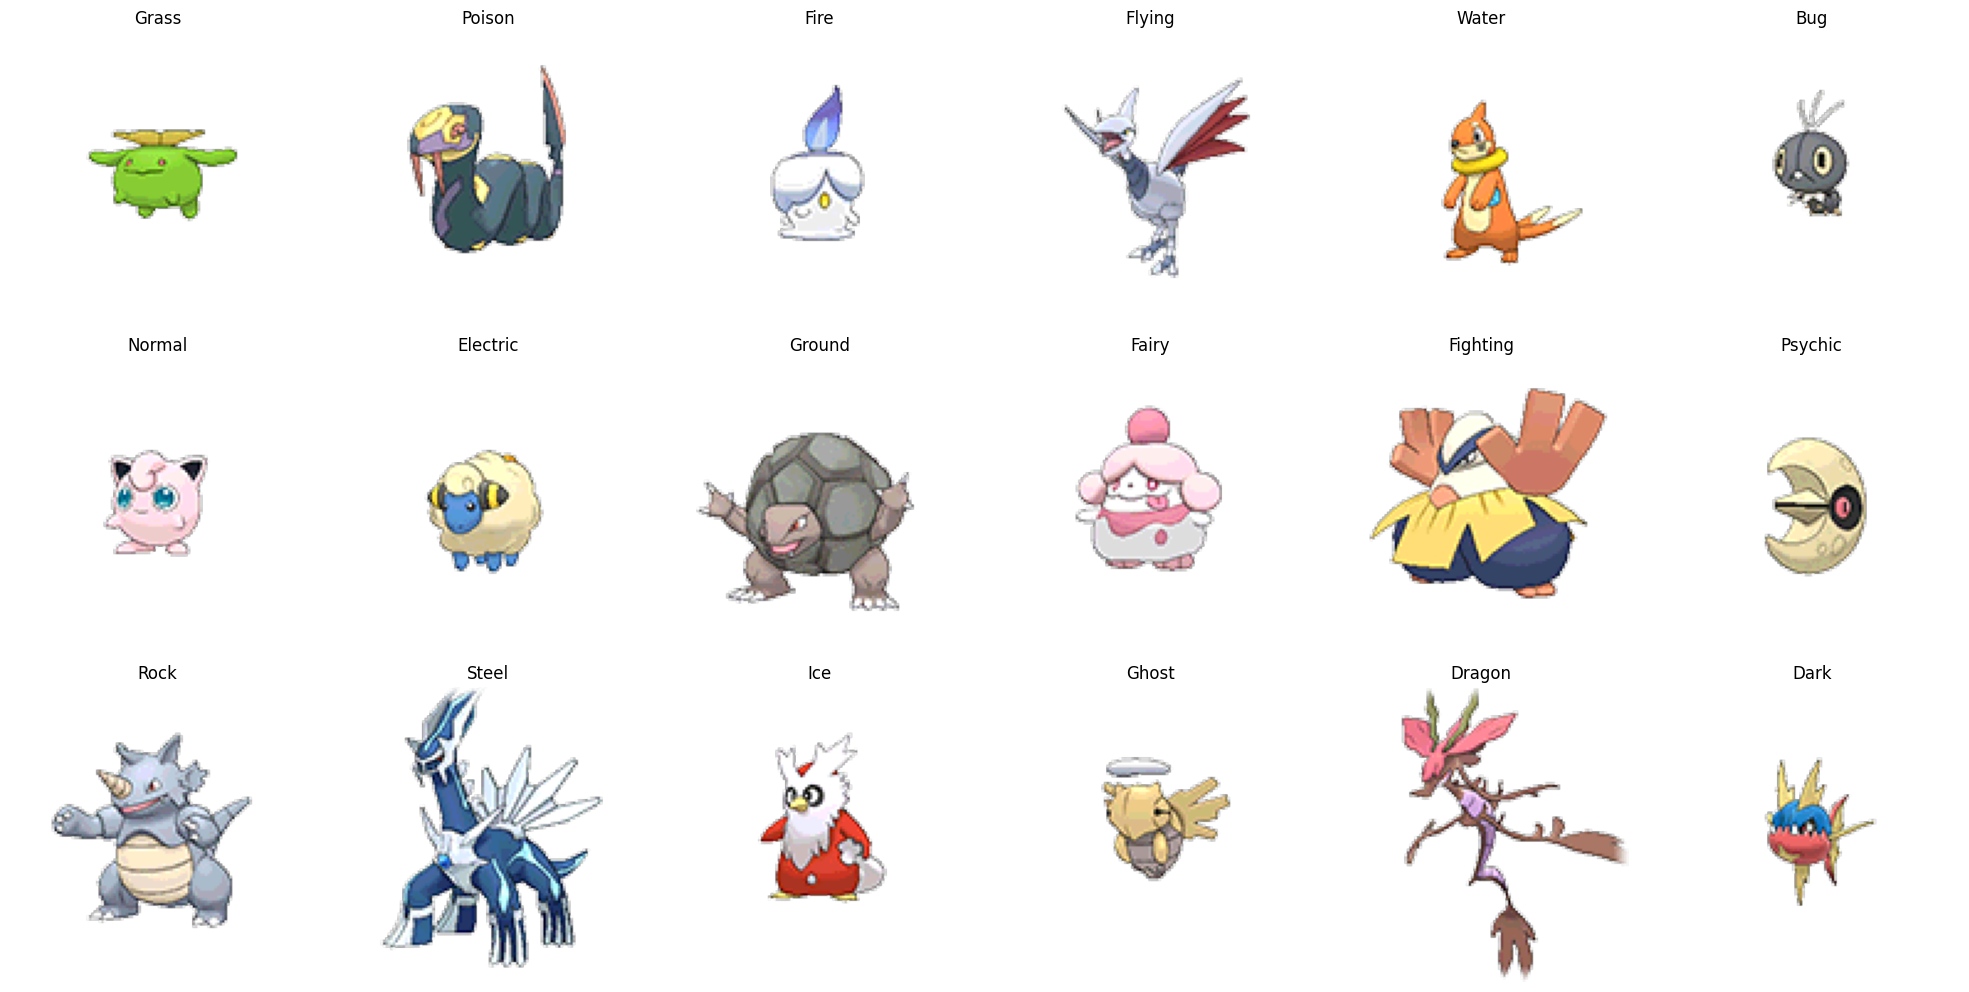

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


random_images = {}
for folder_name in os.listdir(main_path):
    folder_path = os.path.join(main_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        if image_files:
            random_image = random.choice(image_files)
            random_images[folder_name] = os.path.join(folder_path, random_image)

# for folder, image_path in random_images.items():
#    print(f"Random image from '{folder}': {image_path}")

plt.figure(figsize=(20, 10))
for i, (folder, image_path) in enumerate(random_images.items()):
    plt.subplot(3, 6, i + 1)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Generadores

PosixPath('/content/drive/MyDrive/DataScience/data/images_2')

(120, 120)

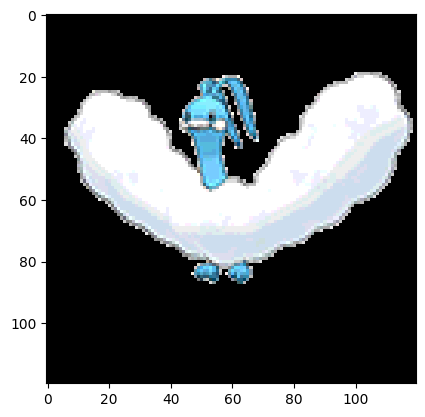

In [ ]:
import pathlib

data_dir = '/content/drive/MyDrive/DataScience/data/images_2'
data_dir = pathlib.Path(data_dir).with_suffix('')
display(data_dir)

# batch size
BATCH_SIZE = 24

# https://keras.io/api/data_loading/image/

# read a image and get shape
img_sample = '/content/drive/MyDrive/DataScience/data/images_2/Dragon/altaria.png'
img = tf.keras.utils.load_img(img_sample, color_mode="rgb")
IMG_SIZE = img.size
display(IMG_SIZE)

# show the image
display(plt.imshow(img))

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 1214 files belonging to 18 classes.
Using 972 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 1214 files belonging to 18 classes.
Using 242 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
18


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(24, 120, 120, 3)
(24,)


In [ ]:
# Standardize the data
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)
img_height, img_width = IMG_SIZE

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()

model.add(data_augmentation)

model.add(layers.Rescaling(1./255))


model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                save_best_only=True,
                                                save_weights_only=False,
                                                monitor='val_accuracy'
                                               )

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     7,373,05

 Total params: 7,667,506 (29.25 MB)

 Trainable params: 7,666,098 (29.24 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
epochs=150
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  #callbacks=[early_stopping, checkpoint]
)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.0745 - loss: 3.7284 - val_accuracy: 0.0992 - val_loss: 3.2944
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.0899 - loss: 3.2710 - val_accuracy: 0.1074 - val_loss: 3.5934
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.1126 - loss: 3.2963 - val_accuracy: 0.0661 - val_loss: 4.3240
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.1554 - loss: 3.1495 - val_accuracy: 0.0661 - val_loss: 8.1180
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.1440 - loss: 3.1915 - val_accuracy: 0.0661 - val_loss: 5.1622
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.1530 - loss: 3.0949 - val_accuracy: 0.0661 - val_loss: 3.9586
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.1317 - loss: 3.0788 - val_accuracy: 0.0248 - val_loss: 6.9530
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.1258 - loss: 3.1529 - val_accuracy:

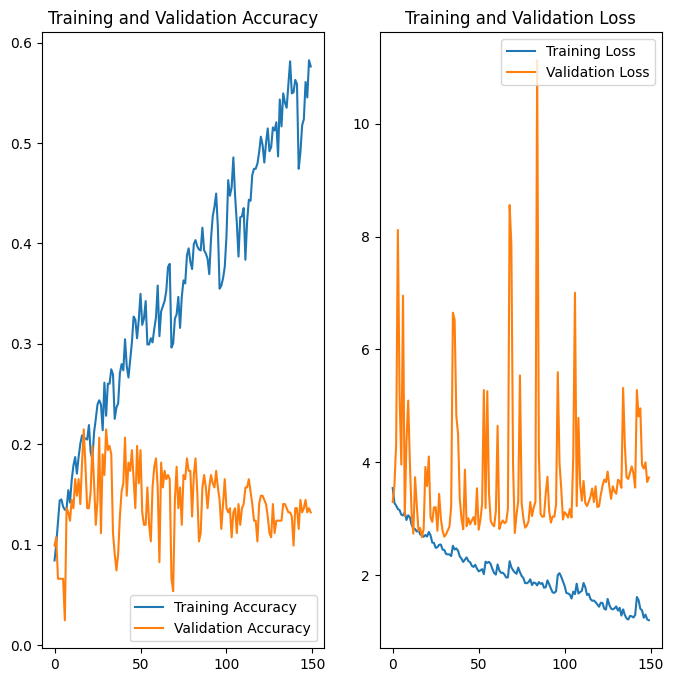

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab outputs/pokemon_classifier_model.h5')
print("Model saved successfully!")

# Load the model for inference
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab outputs/pokemon_classifier_model.h5')
print("Model loaded successfully!")

# You can now use the loaded_model to make predictions on new images

Model saved successfully!


Model loaded successfully!


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Load the model for inference
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab outputs/pokemon_classifier_model.h5')
print("Model loaded successfully!")

# You can now use the loaded_model to make predictions on new images

Model loaded successfully!


In [ ]:
!ls /content/drive/MyDrive/DataScience/data/pkmn_validate

arceus.jpeg	 dialga.png   palkia.png   sprigatito.png
charizard.png	 fuecoco.png  quaxly.jpeg  typhlosion.webp
charizard_y.png  gengar.png   smoliv.png


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

new_images_dir = '/content/drive/MyDrive/DataScience/data/pkmn_validate'

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab outputs/pokemon_classifier_model.h5')
print("Model loaded successfully!")



for filename in sorted(os.listdir(new_images_dir)): #####
    if filename.endswith(('.png', '.jpg', '.jpeg', '.webp')):
        new_image_path = os.path.join(new_images_dir, filename)

        img = image.load_img(new_image_path, target_size=(120, 120))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        predictions = loaded_model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        predicted_class = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)

        print(f"Image: {filename} : {predicted_class}")

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Image: arceus.jpeg : Bug
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: charizard.png : Dragon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image: charizard_y.png : Water
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: dialga.png : Dragon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: fuecoco.png : Psychic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: gengar.png : Dark
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: palkia.png : Psychic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: quaxly.jpeg : Flying
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: smoliv.png : Dragon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: sprigatito.png : Grass
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: typhlosion.webp : Dark


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to your new image
new_image_path = '/content/drive/MyDrive/DataScience/data/images_2/Dragon/altaria.png' # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Create a batch

# Make a prediction
predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted class name
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f}% confidence.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
This image most likely belongs to Dragon with a 11.17% confidence.
